# Microglia activation (GSE99074)

This notebook prepares a **local, reusable** microglia gene-expression dataset so you can later:
- load it from `src/microglia/gse_loader.py`
- compute a microglia activation score from `src/microglia/microglia_score.py`

In [1]:
from __future__ import annotations

import sys
from pathlib import Path

import pandas as pd

# Ensure `import src...` works when running from `notebooks/`
PROJECT_ROOT = Path.cwd().resolve().parents[0]
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

DATA_ROOT = PROJECT_ROOT / "data"
RAW_DIR = DATA_ROOT / "microglia_GSE99074" / "raw"
PROCESSED_DIR = DATA_ROOT / "microglia_GSE99074" / "processed"

RAW_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

RAW_DIR, PROCESSED_DIR


(PosixPath('/Users/yuliasamoilovich/Desktop/neuro_project/data/microglia_GSE99074/raw'),
 PosixPath('/Users/yuliasamoilovich/Desktop/neuro_project/data/microglia_GSE99074/processed'))

## 1) Put the raw GSE99074 files in the right place

You need **two** files under `data/microglia_GSE99074/raw/`:
- `GSE99074_family.soft.gz` (metadata)
- `GSE99074_HumanMicrogliaBrainCounts.txt.gz` (the counts matrix)

The SOFT file is already in your repo, but currently under `data/microglia_GSE127159/raw/`.
This cell copies it over if needed and prints a download URL for the counts matrix.


In [2]:
import shutil

soft_src = DATA_ROOT / "microglia_GSE127159" / "raw" / "GSE99074_family.soft.gz"
soft_dst = RAW_DIR / "GSE99074_family.soft.gz"

if soft_dst.exists():
    print(f"✓ Found: {soft_dst}")
elif soft_src.exists():
    shutil.copy2(soft_src, soft_dst)
    print(f"✓ Copied SOFT file to: {soft_dst}")
else:
    print("✗ Missing SOFT file. Expected either:")
    print(f"  - {soft_dst}")
    print(f"  - {soft_src}")

counts_path = RAW_DIR / "GSE99074_HumanMicrogliaBrainCounts.txt.gz"
if counts_path.exists():
    print(f"✓ Found counts matrix: {counts_path}")
else:
    print("✗ Missing counts matrix:")
    print(f"  {counts_path}")
    print("Download it from GEO and place it in that folder.")
    print("Direct URL (if your environment allows it):")
    print("  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE99nnn/GSE99074/suppl/GSE99074_HumanMicrogliaBrainCounts.txt.gz")


✓ Found: /Users/yuliasamoilovich/Desktop/neuro_project/data/microglia_GSE99074/raw/GSE99074_family.soft.gz
✓ Found counts matrix: /Users/yuliasamoilovich/Desktop/neuro_project/data/microglia_GSE99074/raw/GSE99074_HumanMicrogliaBrainCounts.txt.gz


## 2) Load dataset (metadata + counts)

This uses the repo loader (no `GEOparse` required). If the counts matrix is missing, the loader will fail with a clear message.


In [3]:
from src.microglia.gse_loader import load_gse99074

ds = load_gse99074(root=DATA_ROOT / "microglia_GSE99074")

print("GSE:", ds.gse_id)
print("expression shape (genes x samples):", ds.expression.shape)
print("samples shape:", ds.samples.shape)

if "tissue" in ds.samples.columns:
    display(ds.samples["tissue"].value_counts())

display(ds.samples.head())


GSE: GSE99074
expression shape (genes x samples): (28981, 64)
samples shape: (64, 38)


tissue
microglia    38
brain        26
Name: count, dtype: int64

,sample_title,sample_geo_accession,sample_status,sample_submission_date,sample_last_update_date,sample_type,sample_channel_count,sample_source_name_ch1,sample_organism_ch1,sample_taxid_ch1,...,sample_contact_country,sample_instrument_model,sample_library_selection,sample_library_source,sample_library_strategy,sample_relation,sample_supplementary_file_1,sample_series_id,sample_data_row_count,strain
gsm,,,,,,,,,,,,,,,,,,,,,
GSM3081106,spm09,GSM3081106,Public on Apr 05 2018,Apr 04 2018,Jun 24 2021,SRA,1,microglia,Homo sapiens,9606,...,USA,Illumina HiSeq 2500,cDNA,transcriptomic,RNA-Seq,"[Reanalyzed by: GSE178846, BioSample: https://...",NONE,GSE99074,0,NaN
GSM3081107,spm08,GSM3081107,Public on Apr 05 2018,Apr 04 2018,Jun 24 2021,SRA,1,microglia,Homo sapiens,9606,...,USA,Illumina HiSeq 2500,cDNA,transcriptomic,RNA-Seq,"[Reanalyzed by: GSE178846, BioSample: https://...",NONE,GSE99074,0,NaN
GSM3081108,spm06,GSM3081108,Public on Apr 05 2018,Apr 04 2018,Jun 24 2021,SRA,1,microglia,Homo sapiens,9606,...,USA,Illumina HiSeq 2500,cDNA,transcriptomic,RNA-Seq,"[Reanalyzed by: GSE178846, BioSample: https://...",NONE,GSE99074,0,NaN
GSM3081109,spm05,GSM3081109,Public on Apr 05 2018,Apr 04 2018,Jun 24 2021,SRA,1,microglia,Homo sapiens,9606,...,USA,Illumina HiSeq 2500,cDNA,transcriptomic,RNA-Seq,"[Reanalyzed by: GSE178846, BioSample: https://...",NONE,GSE99074,0,NaN
GSM3081110,spm04,GSM3081110,Public on Apr 05 2018,Apr 04 2018,Jun 24 2021,SRA,1,microglia,Homo sapiens,9606,...,USA,Illumina HiSeq 2500,cDNA,transcriptomic,RNA-Seq,"[Reanalyzed by: GSE178846, BioSample: https://...",NONE,GSE99074,0,NaN


## 3) Normalize + save processed artifacts

Goal: write a clean `processed/` folder that `src/` code can reuse without re-parsing raw files.


In [4]:
from src.microglia.gse_loader import log_cpm

# log(CPM + 1)
expr_logcpm = log_cpm(ds.expression, pseudocount=1.0)

# Save processed artifacts
meta_out = PROCESSED_DIR / "sample_metadata.tsv"
expr_out = PROCESSED_DIR / "expression_logcpm.tsv.gz"

ds.samples.to_csv(meta_out, sep="\t", index=True)
expr_logcpm.to_csv(expr_out, sep="\t", index=True, compression="gzip")

print("Wrote:")
print(" ", meta_out)
print(" ", expr_out)
print("expr_logcpm shape:", expr_logcpm.shape)


Wrote:
  /Users/yuliasamoilovich/Desktop/neuro_project/data/microglia_GSE99074/processed/sample_metadata.tsv
  /Users/yuliasamoilovich/Desktop/neuro_project/data/microglia_GSE99074/processed/expression_logcpm.tsv.gz
expr_logcpm shape: (28981, 64)


## 4) Compute an inflammation score (age-adjusted)

Goal: a microglia **inflammation** score that is **not just aging**.

Because the GSE99074 expression matrix is indexed by Ensembl IDs (ENSG...), we map Ensembl → gene symbols (cached under `processed/`), compute a curated inflammation signature score, then residualize it against age.


Fetching Ensembl→symbol mapping for 28981 genes...
Wrote mapping cache: /Users/yuliasamoilovich/Desktop/neuro_project/data/microglia_GSE99074/processed/ensembl_to_symbol.tsv (23450 genes)
expr_microglia_sym shape (symbols x samples): (23263, 38)
inflammation genes used: 14 / 14


,age,tissue,inflammation_score_raw,inflammation_score_age_adjusted
GSM3081106,78,microglia,0.446986,0.658813
GSM3081107,78,microglia,0.598831,0.902291
GSM3081108,56,microglia,0.095280,0.201268
GSM3081109,62,microglia,-0.660404,-1.039456
GSM3081110,77,microglia,-0.903781,-1.502246


Wrote: /Users/yuliasamoilovich/Desktop/neuro_project/data/microglia_GSE99074/processed/microglia_inflammation_scores.tsv


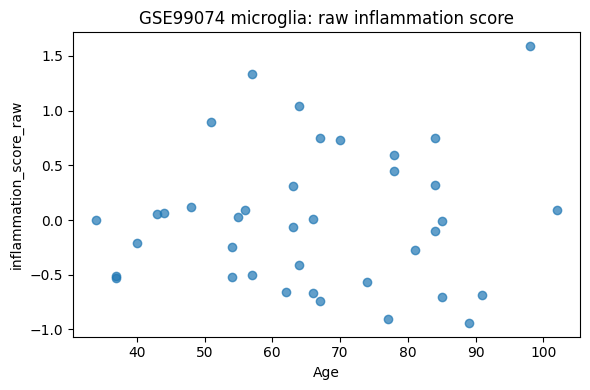

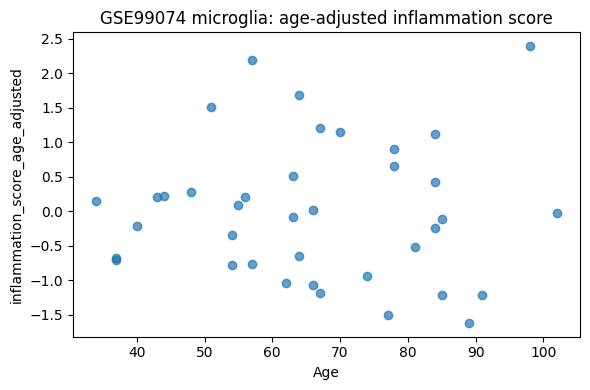

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

from src.microglia.gse_loader import (
    convert_ensembl_index_to_symbols,
    fetch_ensembl_to_symbol_map,
    strip_ensembl_version,
)
from src.microglia.microglia_score import (
    MICROGLIA_INFLAMMATION_UP,
    microglia_inflammation_score,
    residualize_against_age,
)

meta = ds.samples.copy()
meta["age"] = pd.to_numeric(meta.get("age"), errors="coerce")

if "tissue" not in meta.columns:
    raise ValueError("Expected a 'tissue' column in parsed SOFT metadata.")

# Subset to microglia samples
microglia_ids = meta.index[meta["tissue"].astype(str).str.lower().eq("microglia")]
expr_microglia = expr_logcpm.loc[:, expr_logcpm.columns.intersection(microglia_ids)]
if expr_microglia.empty:
    raise ValueError(
        "Microglia expression matrix is empty after subsetting. "
        "This usually means expression columns don't match metadata sample IDs. "
        "Re-run the dataset load + normalization cells."
    )

# Map Ensembl IDs -> gene symbols (requires network the first time; caches to processed/)
mapping_cache = PROCESSED_DIR / "ensembl_to_symbol.tsv"
if mapping_cache.exists():
    mapping_df = pd.read_csv(mapping_cache, sep="\t")
    ensembl_to_symbol = dict(zip(mapping_df["ensembl_id"], mapping_df["symbol"]))
    print(f"Loaded mapping cache: {mapping_cache} ({len(ensembl_to_symbol)} genes)")
else:
    ensembl_ids = [strip_ensembl_version(x) for x in expr_microglia.index.astype(str)]
    ensembl_ids = sorted(set([x for x in ensembl_ids if x.startswith("ENSG")]))
    print(f"Fetching Ensembl→symbol mapping for {len(ensembl_ids)} genes...")
    try:
        ensembl_to_symbol = fetch_ensembl_to_symbol_map(ensembl_ids)
    except Exception as e:
        raise RuntimeError(
            "Failed to fetch Ensembl→symbol mapping. "
            "Enable network access (or create a local mapping file) and re-run this cell."
        ) from e
    mapping_out = pd.DataFrame(
        {"ensembl_id": list(ensembl_to_symbol.keys()), "symbol": list(ensembl_to_symbol.values())}
    ).sort_values(["ensembl_id"])
    mapping_out.to_csv(mapping_cache, sep="\t", index=False)
    print(f"Wrote mapping cache: {mapping_cache} ({len(ensembl_to_symbol)} genes)")

expr_microglia_sym = convert_ensembl_index_to_symbols(expr_microglia, ensembl_to_symbol, drop_unmapped=True)
print("expr_microglia_sym shape (symbols x samples):", expr_microglia_sym.shape)

# Curated inflammation signature score (gene symbols)
infl = microglia_inflammation_score(expr_microglia_sym, inflammation_genes=MICROGLIA_INFLAMMATION_UP, min_genes=5)

scores = pd.DataFrame(index=expr_microglia_sym.columns).join(meta[["age", "tissue"]], how="left")
scores["inflammation_score_raw"] = infl.score
print(f"inflammation genes used: {len(infl.genes_used)} / {len(MICROGLIA_INFLAMMATION_UP)}")
if infl.genes_missing:
    print("missing examples:", infl.genes_missing[:10])

# Remove age effects: residuals from linear model score ~ age
scores["inflammation_score_age_adjusted"] = residualize_against_age(
    scores["inflammation_score_raw"], scores["age"], standardize=True
)

display(scores.head())

# Save scores
scores_out = PROCESSED_DIR / "microglia_inflammation_scores.tsv"
scores.to_csv(scores_out, sep="\t", index=True)
print("Wrote:", scores_out)

# Plot: raw vs age, then age-adjusted vs age (microglia only)
plot_df = scores.loc[microglia_ids].dropna(subset=["age", "inflammation_score_raw", "inflammation_score_age_adjusted"]).copy()
plt.figure(figsize=(6, 4))
plt.scatter(plot_df["age"], plot_df["inflammation_score_raw"], alpha=0.7)
plt.xlabel("Age")
plt.ylabel("inflammation_score_raw")
plt.title("GSE99074 microglia: raw inflammation score")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(plot_df["age"], plot_df["inflammation_score_age_adjusted"], alpha=0.7)
plt.xlabel("Age")
plt.ylabel("inflammation_score_age_adjusted")
plt.title("GSE99074 microglia: age-adjusted inflammation score")
plt.tight_layout()
plt.show()
